In [23]:
!pip3 install numpngw

In [24]:
# from google.colab import drive
# from google.colab import output
# drive.mount('/content/gdrive')

In [25]:
# colab_path = "/content/gdrive/My Drive/Colab Notebooks/"

# # Repository compile
# %cd $colab_path

In [26]:
import cv2
import json
import numpy as np
import imutils
import sys
import time
import json
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from lib.utils.common_draw_skeletons_ok import Human, BodyPart, CocoPart,CocoColors_pairs_vc,CocoColors_pairs_kn,CocoColors_parts_vc,CocoColors_parts_kn,CocoColors_pairs,CocoColors_parts 


In [27]:
#initialize jobs
attrs=[]
path_openpose='../Skeleton_Openpose/cacheTete/sub01_trial01/VideoColor_Correct0.txt'
path_kinect='../Skeleton_Kinect/cacheTete/sub01_trial01/SkeletonKinect_Correct0.txt'
# path_vicon='../Skeleton_Vicon/cacheTete/sub01_trial01/SkeletonVicon_Correct0.txt'
height=300
width=500
size=(width,height)
image_w=width
image_h=height
images=[]


#read Json openpose file
def read_json(path):
    with open(path,'r') as f:
        data=f.read()
        for i in Body_parts_1:
            data=data.replace(i,str(Body_parts_1[i]))
        json_object=json.loads(data)
    return json_object

In [28]:
def euler_from_quaternion(x, y, z, w):
        """
        Convert a quaternion into euler angles (roll, pitch, yaw)
        roll is rotation around x in radians (counterclockwise)
        pitch is rotation around y in radians (counterclockwise)
        yaw is rotation around z in radians (counterclockwise)
        """
        t0 = +2.0 * (w * x + y * z)
        t1 = +1.0 - 2.0 * (x * x + y * y)
        roll_x = math.atan2(t0, t1)
     
        t2 = +2.0 * (w * y - z * x)
        t2 = +1.0 if t2 > +1.0 else t2
        t2 = -1.0 if t2 < -1.0 else t2
        pitch_y = math.asin(t2)
     
        t3 = +2.0 * (w * z + x * y)
        t4 = +1.0 - 2.0 * (y * y + z * z)
        yaw_z = math.atan2(t3, t4)
     
        return [roll_x,pitch_y,yaw_z]

In [29]:
#Draw human skeleton function for openpose 
def draw_humans_openpose(npimg, humans):
    
    image_h, image_w = npimg.shape[:2]
    #print(image_h, image_w)
    
    centers = {}
    human_keys=list(map(int, humans.keys()))
    #print(human_keys)
    
    
    # draw point
    for i in range(CocoPart.Background.value):
            if i not in human_keys:
                #print (i)
                #print('no')
                continue
            
            body_part = sklt[str(i)]
            #print(body_part)
            
            center = (int(body_part[0] * image_w - 40), int(body_part[1] * image_h + 0.5))
            centers[i] = center
            #print(center)
            
            cv2.circle(npimg, center, 3, CocoColors_parts[i], thickness=2, lineType=8, shift=0)

        # draw line
    for pair_order, pair in enumerate(CocoPairsRender):
            #print(pair_order, pair[1])
            
            if pair[0] not in human_keys or pair[1] not in human_keys:
                continue
            #print(pair, centers[pair[0]], centers[pair[1]], CocoColors_pairs[pair])
            cv2.line(npimg, centers[pair[0]], centers[pair[1]], CocoColors_pairs[pair], 2)

    return npimg

In [30]:
#Draw human skeleton function for Kinect
def draw_humans_kinect(npimg, humans):

    image_h, image_w = npimg.shape[:2]
    #print(image_h, image_w)
    
    centers = {}
    human_keys=list(map(int, humans.keys()))
    #print(human_keys)
   
    # draw point
    for i in range(CocoPart.Background.value):
            if i not in human_keys:
                #print (i)
                #print('no')
                continue
            
            body_part = sklt[str(i)]
            #print(body_part)
            #print(type(body_part[0]))
            #print(type(body_part[1]))
            #print(image_w)
            #print(image_h)
            center = (int((float(body_part[0]) * image_w + 200)/3.5+250), int((float(body_part[1]) * image_h + 200)/3.5+100))
            centers[i] = center
            #print(center)
            
            cv2.circle(npimg, center, 3, CocoColors_parts_kn[i], thickness=2, lineType=8, shift=0)
            
        # draw line
    
    #print(enumerate(CocoPairsRender_kn))
    for pair_order, pair in enumerate(CocoPairsRender_kn):
            #print(pair_order, pair[1])
            #print(pair)
            
            if pair[0] not in human_keys or pair[1] not in human_keys:
                continue
            #print(centers[pair[0]], centers[pair[1]], CocoColors_pairs_kn[pair])
            cv2.line(npimg, centers[pair[0]], centers[pair[1]], CocoColors_pairs_kn[pair], 2)

    return npimg


In [31]:
#Draw human skeleton function for Vicon 
def draw_vicon_3d(i):
    fig = plt.figure()
    #ax = fig.add_subplot(projection='3d')
    ax = plt.axes(projection='3d')
    X=[]
    Y=[]
    Z=[]
    for j in range(0,len(openpose_coord_vc['positions'][str(float(i))])):
        #print(str(i))
                pos_head=openpose_coord_vc['positions'][str(float(i))][str(0)]
                param_x=0.5*image_w-float(pos_head[0])
                param_y=0.5*image_h-float(pos_head[1])
                md_pt=openpose_coord_vc['positions'][str(float(i))][str(j)]
                #X.append(float(md_pt[0])*image_w/600-param_x)
                #Y.append(float(md_pt[1])*image_h/600-param_y)
                X.append(float(md_pt[0])*image_w/600)
                Y.append(float(md_pt[1])*image_h/600-image_h)
                Z.append(float(md_pt[2])/600)

    res=euler_from_quaternion(float(md_pt[3]),float(md_pt[4]),float(md_pt[5]),float(md_pt[6]))
    ax.scatter3D(X, Y, Z, color=(0,1,0) ,s=53 ,marker='o')
    ax.set_facecolor('xkcd:black')
    ax.set_ylim3d(-400,400)
    #ax.set_xlim3d(30,400)
    ax.set_xlim3d(-200,800)
    
    #ax.set_zlim3d(-40,40)
    for pair in CocoPairs_vc:
        X_pair=[X[pair[0]],X[pair[1]]]
        Y_pair=[Y[pair[0]],Y[pair[1]]]
        Z_pair=[Z[pair[0]],Z[pair[1]]]
        ax.plot(X_pair,Y_pair,Z_pair,color='green',linewidth=5)	
    ax.view_init(res[1], res[0])
    plt.grid(b=None)
    plt.axis('off')
    plt.subplots_adjust(bottom=0.01)
    fig.canvas.draw()
    img = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8,sep='')
    img  = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    img[np.where((img==[255,255,255]).all(axis=2))] = [0,0,0]
    return img

In [32]:
#cocopairs for openpose	
CocoPairs = [
    (1, 2), (1, 5), (2, 3), (3, 4), (5, 6), (6, 7), (1, 8), (8, 9), (9, 10), (1, 11),
    (11, 12), (12, 13), (1, 0), (0, 14), (14, 16), (0, 15), (15, 17), (2, 16), (5, 17)
]   
CocoPairsRender = CocoPairs[:-2] 

Body_parts_0={0:'Head',1:'mShoulder',2:'rShoulder',3:'rElbow',4:'rWrist',5:'lShoulder',6:'lElbow',7:'lWrist',8:'rHip',9:'rKnee',10:'rAnkle',11:'lHip',12:'lKnee',13:'lAnkle',14:'rEye', 15:'lEye',16:'rEar', 17:'lEar'}
Body_parts_1={'Head':0 ,'mShoulder':1 ,'rShoulder':2, 'rElbow':3, 'rWrist':4, 'lShoulder':5,'lElbow':6,'lWrist':7,'rHip':8,'rKnee':9,'rAnkle':10,'lHip':11,'lKnee':12,'lAnkle':13,'rEye':14, 'lEye':15,'rEar':16, 'lEar':17  }



########################Prepare Skeletons data#################################
#Read openpose Json file
openpose_coord=read_json(path_openpose)

#read Kinect txt file and map it to the correct json format
with open(path_kinect,'r') as f:
    data=f.read().splitlines()


tab={}
tab1={}
tab1['positions']=tab
data1={'positions':{}}

Body_parts_0={0:'Head',1:'mShoulder',2:'rShoulder',3:'rElbow',4:'rWrist',5:'lShoulder',6:'lElbow',7:'lWrist',8:'rHip',9:'rKnee',10:'rAnkle',11:'lHip',12:'lKnee',13:'lAnkle',14:'rEye', 15:'lEye',16:'rEar', 17:'lEar'}

Body_parts_kinect={0: 'SpineBase' ,1: 'SpineMid',2: 'Neck',3: 'Head',4: 'ShoulderLeft',5: 'ElbowLeft',6: 'WristLeft',7: 'HandLeft',8: 'ShoulderRight',9: 'ElbowRight',10: 'WristRight',11: 'HandRight',12: 'HipLeft',13: 'KneeLeft',14: 'AnkleLeft',15: 'FootLeft',16: 'HipRight',17: 'KneeRight',18: 'AnkleRight',19: 'FootRight',20: 'SpineShoulder',21: 'HandTipLeft',22: 'ThumbLeft',23: 'HandTipRight',24: 'ThumbRight'}

line=0
for i in data:
    line=line+1
    tab[str(float(line))]={}
    for n in range(25):
        first=i.split(' ')[7*n:7*(n+1)]
        first1={str(n):[first[0],first[1]]}
        tab[str(float(line))].update(first1)
openpose_coord_kn=tab1


#read Vicon txt file and map it to the correct json format
tab_vc={}
tab1_vc={}
tab1_vc['positions']=tab_vc


data1_vc={'positions':{}}
data_vc_filtred=[]
with open(path_vicon,'r') as w:
    data_vc=w.read().splitlines()
    for j in range(0,len(data_vc)):
        if j%2==0:
            data_vc_filtred.append(data_vc[j])
    #print(len(data_vc_filtred))
    data_vc=data_vc_filtred


print('start vicon')
line=0
for i in data_vc:
    line=line+1
    tab_vc[str(float(line))]={}
    for n in range(17):
        first=i.split(' ')[7*n:7*(n+1)]
        first1={str(n):[first[0],first[1],first[2],first[3],first[4],first[5],first[6]]}
        tab_vc[str(float(line))].update(first1)

openpose_coord_vc=tab1_vc

start vicon


In [33]:
#start Processing Skeletons Data 

result = cv2.VideoWriter('/root/Desktop/vcop.avi',  
                         cv2.VideoWriter_fourcc(*'MJPG'), 
                         10, size)

# Defining the skeletons pairs
CocoPairs_kn = [
    (0,1),(1,2),(2,3), (2,4),(4,5),(5,6),(6,7),(2,8),(8,9),(9,10),(10,11),(0,12),(12,13),(13,14),(14,15),(0,16),(16,17),(17,18),(18,19)]
CocoPairsRender_kn = CocoPairs_kn[:-2]
CocoPairs_vc=[(14,8),(14,7),(7,2),(8,3),(0,2),(1,3),(0,9),(1,10),(14,4),(4,13),(13,5),(13,6),(5,15),(6,16),(11,15),(12,16)]
CocoPairsRender_vc=CocoPairs_vc

<class 'numpy.ndarray'>
{'0': ['0.314218', '-0.552000'], '1': ['0.329507', '-0.317089'], '2': ['0.342402', '-0.085162'], '3': ['0.354231', '0.051321'], '4': ['0.173780', '-0.144985'], '5': ['0.093711', '-0.379156'], '6': ['0.043818', '-0.540883'], '7': ['0.033154', '-0.573384'], '8': ['0.497256', '-0.170934'], '9': ['0.530679', '-0.384866'], '10': ['0.475661', '-0.528745'], '11': ['0.463040', '-0.563915'], '12': ['0.233306', '-0.540649'], '13': ['0.066617', '-0.617924'], '14': ['0.088812', '-1.031402'], '15': ['0.053756', '-1.086641'], '16': ['0.388843', '-0.552662'], '17': ['0.455243', '-0.627377'], '18': ['0.457233', '-1.044688'], '19': ['0.482723', '-1.089851'], '20': ['0.339469', '-0.142756'], '21': ['0.010450', '-0.636154'], '22': ['0.008446', '-0.603280'], '23': ['0.432217', '-0.596971'], '24': ['0.400418', '-0.572324']}


<ipython-input-31-b4d5326f9c72>:39: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  img = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8,sep='')


NameError: name 'CocoPart' is not defined

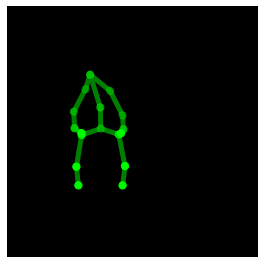

In [35]:
#Start plotting skeletons

for i in range(1,len(openpose_coord_vc['positions'])-4):
    #vicon
    img_vc=draw_vicon_3d(i)
    print(type(img_vc))
    img_vc2=cv2.resize(img_vc, size, interpolation = cv2.INTER_AREA)
    black_image_vc = np.zeros((height,width,3), np.uint8)
    #print(openpose_coord_vc['positions'][str(float(i))].keys())
    cv2.putText(img_vc2,"Vicon Skeleton", (int(width/8),50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255))
    
    #kinect
    black_image_kn = np.zeros((height,width,3), np.uint8)
    #print(openpose_coord_kn['positions'][str(float(i))].keys())
    #print(openpose_coord_kn['positions'][str(float(i))])
    sklt=openpose_coord_kn['positions'][str(float(i))]
    black_image_op = np.zeros((height,width,3), np.uint8)
    print(sklt)
    frame_image=draw_humans_kinect(black_image_kn,sklt)
    frame_image=cv2.flip(frame_image, 0)
    frame_image_kn=cv2.flip(frame_image, 1) #symmetry
    cv2.putText(frame_image_kn,"Kinect Skeleton", (int(width/8),50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255))
    
    #openpose
    sklt=openpose_coord['positions'][str(float(i))]
    frame_image_op=draw_humans_openpose(black_image_op,sklt)
    frame_image_op=cv2.flip(frame_image_op, 1) #symmetry
    cv2.putText(frame_image_op,"Openpose Skeleton", (int(width/8),50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255))
    glob=np.concatenate((frame_image_op,frame_image_kn,img_vc2), axis=1)
    images.append(glob)
    #cv2.imshow("Skeleton",glob)
    #result.write(glob)
    #cv2.waitKey(300)

In [ ]:
from IPython.display import Image
from numpngw import write_apng

#imageio.mimsave('a2c.gif', [np.array(img) for i, img in enumerate(images) if i%2 == 0], fps=29)
write_apng('outvideo.png', images, delay=60)
Image(filename='outvideo.png')